# Importing all the required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# Loading our dataset

In [2]:
data = pd.read_csv('./Countries_and_continents_of_the_world.csv',decimal=',')
data.head()

,temp_coldestQuart,temp_driestQuart,Agriculture,Country Name,Net migration,Coastline (coast/area ratio),Capital,accessibility_to_cities,Population 2020,Population,...,cloudiness,geonumber,Region,Pop. Density (per sq. mi.),temp_seasonality,Area (sq. mi.),Geoname ID,Industry,climate_additional_description,climate
0,-0.261351562,21.12032868,0.380,Afghanistan,23.06,0.00,Kabul,317.7157523,NaN,31056997.0,...,114.2289826,22376.749753,ASIA (EX. NEAR EAST),48.0,88.15351475,647500.0,1149361.0,0.240,arid to semiarid; cold winters and hot summers,Warm Temperate/Mediterranean
1,-4.101204694,-1.280922106,NaN,Aland Islands,NaN,NaN,Mariehamn,235.0688642,NaN,NaN,...,NaN,27052.0500565,WESTERN EUROPE,NaN,72.67069411,NaN,661882.0,NaN,NaN,Cool/Taiga/Siberian Temperate
2,3.57989578,19.57320594,0.232,Albania,-4.93,1.26,Tirana,73.83085556,NaN,3581655.0,...,181.1311126,23627.768091,EASTERN EUROPE,124.6,62.66851506,28748.0,783754.0,0.188,"mild temperate; cool, cloudy, wet winters; hot...",Temperate Grasslands/Steppe
3,13.15155341,26.92107243,0.101,Algeria,-0.39,0.04,Algiers,1212.799818,NaN,32930091.0,...,90.67439498,21247.759106,NORTHERN AFRICA,13.8,75.11026261,2381740.0,2589581.0,0.600,"arid to semiarid; mild, wet winters with hot, ...",Hot/Mid-Latitude Desert
4,25.69602037,25.85901126,NaN,American Samoa,-20.71,58.29,Pago Pago,323.0643275,NaN,57794.0,...,256.02985440000003,13461.092822999999,OCEANIA,290.4,4.975535442,199.0,5880801.0,NaN,"tropical marine, moderated by southeast trade ...",Savana/Sudan


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 51 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   temp_coldestQuart                   236 non-null    object 
 1   temp_driestQuart                    236 non-null    object 
 2   Agriculture                         211 non-null    float64
 3   Country Name                        269 non-null    object 
 4   Net migration                       223 non-null    float64
 5   Coastline (coast/area ratio)        226 non-null    float64
 6   Capital                             243 non-null    object 
 7   accessibility_to_cities             237 non-null    object 
 8   Population 2020                     46 non-null     object 
 9   Population                          226 non-null    object 
 10  Climate_short_desc                  204 non-null    object 
 11  temp_annual_range                   236 non-n

In [4]:
data.describe(include='all')

,temp_coldestQuart,temp_driestQuart,Agriculture,Country Name,Net migration,Coastline (coast/area ratio),Capital,accessibility_to_cities,Population 2020,Population,...,cloudiness,geonumber,Region,Pop. Density (per sq. mi.),temp_seasonality,Area (sq. mi.),Geoname ID,Industry,climate_additional_description,climate
count,236,236,211.000000,269,223.000000,226.000000,243,237,46,226,...,233,265,269,226.000000,236,226,249,210.000000,242,269
unique,236,236,NaN,269,NaN,NaN,242,237,46,226,...,233,262,12,NaN,236,225,249,NaN,236,7
top,-0.261351562,21.12032868,NaN,Afghanistan,NaN,NaN,Kingston,317.7157523,77265.0,31056997.0,...,114.2289826,15494.858724000002,SUB-SAHARAN AFRICA,NaN,88.15351475,102.0,1149361.0,NaN,"tropical; always hot, humid",Savana/Sudan
freq,1,1,NaN,1,NaN,NaN,2,1,1,1,...,1,2,59,NaN,1,2,1,NaN,2,73
mean,NaN,NaN,0.148953,NaN,0.038296,21.258982,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,380.606195,NaN,NaN,NaN,0.283533,NaN,NaN
std,NaN,NaN,0.144534,NaN,4.900268,72.433520,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1663.704485,NaN,NaN,NaN,0.138084,NaN,NaN
min,NaN,NaN,0.000000,NaN,-20.990000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,NaN,NaN
25%,NaN,NaN,0.037500,NaN,-0.945000,0.100000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,29.725000,NaN,NaN,NaN,0.196500,NaN,NaN
50%,NaN,NaN,0.099000,NaN,0.000000,0.760000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,79.150000,NaN,NaN,NaN,0.272500,NaN,NaN
75%,NaN,NaN,0.218500,NaN,1.005000,10.357500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,190.975000,NaN,NaN,NaN,0.341500,NaN,NaN


# Summary on NaN and missing values

In [5]:
print('number of missing data:')
print(data.isnull().sum())

number of missing data:
temp_coldestQuart                      33
temp_driestQuart                       33
Agriculture                            58
Country Name                            0
Net migration                          46
Coastline (coast/area ratio)           43
Capital                                26
accessibility_to_cities                32
Population 2020                       223
Population                             43
Climate_short_desc                     65
temp_annual_range                      33
elevation                              34
Phones (per 1000)                      47
Continent                               0
Development Status                      0
Climate_index                          65
Literacy (%)                           61
temp_diurnal_range                     33
latitude                                0
temp_warmestQuart                      33
Birthrate                              46
official_name_en                       30
Service   

In [6]:
data.groupby('Region')[['GDP ($ per capita)','Literacy (%)','Agriculture']].median()

/tmp/ipykernel_4357/1255257098.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Region')[['GDP ($ per capita)','Literacy (%)','Agriculture']].median()


,Literacy (%),Agriculture
Region,,
ANTARTICA,NaN,NaN
ASIA (EX. NEAR EAST),90.60,0.1610
BALTICS,99.80,0.0400
C.W. OF IND. STATES,99.05,0.1980
EASTERN EUROPE,98.60,0.0815
LATIN AMER. & CARIB,94.05,0.0700
NEAR EAST,83.00,0.0350
NORTHERN AFRICA,70.00,0.1320
NORTHERN AMERICA,97.50,0.0100


In [7]:
columns = ['Country Name', 'Region', 'GDP ($ per capita)', 'climate', 'Population', 'Area (sq. mi.)',\
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',\
       'Net migration', 'Infant mortality (per 1000 births)',\
       'Literacy (%)', 'Phones (per 1000)','Birthrate',\
       'Deathrate', 'Agriculture', 'Industry','Service']
data = data[data.columns[data.columns.isin(columns)]]
data

,Agriculture,Country Name,Net migration,Coastline (coast/area ratio),Population,Phones (per 1000),Literacy (%),Birthrate,Service,Infant mortality (per 1000 births),GDP ($ per capita),Deathrate,Region,Pop. Density (per sq. mi.),Area (sq. mi.),Industry,climate
0,0.380,Afghanistan,23.06,0.00,31056997.0,3.2,36.0,46.60,0.380,163.07,700.0,20.34,ASIA (EX. NEAR EAST),48.0,647500.0,0.240,Warm Temperate/Mediterranean
1,NaN,Aland Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WESTERN EUROPE,NaN,NaN,NaN,Cool/Taiga/Siberian Temperate
2,0.232,Albania,-4.93,1.26,3581655.0,71.2,86.5,15.11,0.579,21.52,4500.0,5.22,EASTERN EUROPE,124.6,28748.0,0.188,Temperate Grasslands/Steppe
3,0.101,Algeria,-0.39,0.04,32930091.0,78.1,70.0,17.14,0.298,31.00,6000.0,4.61,NORTHERN AFRICA,13.8,2381740.0,0.600,Hot/Mid-Latitude Desert
4,NaN,American Samoa,-20.71,58.29,57794.0,259.5,97.0,22.46,NaN,9.27,8000.0,3.27,OCEANIA,290.4,199.0,NaN,Savana/Sudan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0.090,West Bank,2.98,0.00,2460492.0,145.2,NaN,31.67,0.630,19.62,800.0,3.92,NEAR EAST,419.9,5860.0,0.280,Warm Temperate/Mediterranean
265,NaN,Western Sahara,NaN,0.42,273008.0,NaN,NaN,NaN,0.400,NaN,NaN,NaN,NORTHERN AFRICA,1.0,266000.0,NaN,Hot/Mid-Latitude Desert
266,0.135,Yemen,0.00,0.36,21456188.0,37.2,50.2,42.89,0.393,61.50,800.0,8.30,NEAR EAST,40.6,527970.0,0.472,Savana/Sudan
267,0.220,Zambia,0.00,0.00,11502010.0,8.2,80.6,41.00,0.489,88.29,800.0,19.93,SUB-SAHARAN AFRICA,15.3,752614.0,0.290,Savana/Sudan


# Data Preparation
 We have to convert all data to their proper formats. There are missing values in our dataset, so we will take average and fill our dataset Also, we will have to look into textual attribute as average doesn't work on such attributes.

In [8]:
data['GDP ($ per capita)'] = pd.to_numeric(data['GDP ($ per capita)'], errors='coerce')
data['Area (sq. mi.)'] = pd.to_numeric(data['Area (sq. mi.)'], errors='coerce')
data['Population'] = pd.to_numeric(data['Population'], errors='coerce')
data.rename(columns = {'Country Name': 'Country'}, inplace = True)
data.rename(columns = {'climate': 'Climate'}, inplace = True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Agriculture                         211 non-null    float64
 1   Country                             269 non-null    object 
 2   Net migration                       223 non-null    float64
 3   Coastline (coast/area ratio)        226 non-null    float64
 4   Population                          226 non-null    float64
 5   Phones (per 1000)                   222 non-null    float64
 6   Literacy (%)                        208 non-null    float64
 7   Birthrate                           223 non-null    float64
 8   Service                             211 non-null    float64
 9   Infant mortality (per 1000 births)  223 non-null    float64
 10  GDP ($ per capita)                  225 non-null    float64
 11  Deathrate                           222 non-n

In [9]:
for col in data.columns.values:
    if data[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = data.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    elif col != 'Capital':
        guess_values = data.groupby('Region')[col].median()
    for region in data['Region'].unique():
        data[col].loc[(data[col].isnull())&(data['Region']==region)] = guess_values[region]
data.isnull().sum()

/tmp/ipykernel_4357/2053819817.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].loc[(data[col].isnull())&(data['Region']==region)] = guess_values[region]
/tmp/ipykernel_4357/2053819817.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].loc[(data[col].isnull())&(data['Region']==region)] = guess_values[region]
/tmp/ipykernel_4357/2053819817.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].loc[(data[co

Agriculture                           1
Country                               0
Net migration                         1
Coastline (coast/area ratio)          1
Population                            1
Phones (per 1000)                     1
Literacy (%)                          1
Birthrate                             1
Service                               1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    1
Deathrate                             1
Region                                0
Pop. Density (per sq. mi.)            1
Area (sq. mi.)                        1
Industry                              1
Climate                               0
dtype: int64

#### We still have some missing values so filling it with mean values again

In [10]:
data = data.fillna(data.mean())
data.isnull().sum()

/tmp/ipykernel_4357/2424867094.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


Agriculture                           0
Country                               0
Net migration                         0
Coastline (coast/area ratio)          0
Population                            0
Phones (per 1000)                     0
Literacy (%)                          0
Birthrate                             0
Service                               0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Deathrate                             0
Region                                0
Pop. Density (per sq. mi.)            0
Area (sq. mi.)                        0
Industry                              0
Climate                               0
dtype: int64

# Data Exploration
### Top Countries with highest GDP
Luxembourg is quite ahead of other countries. Rest 19 countries are catching up. France's GDP is 2.5 times greater than the average of world wealth.

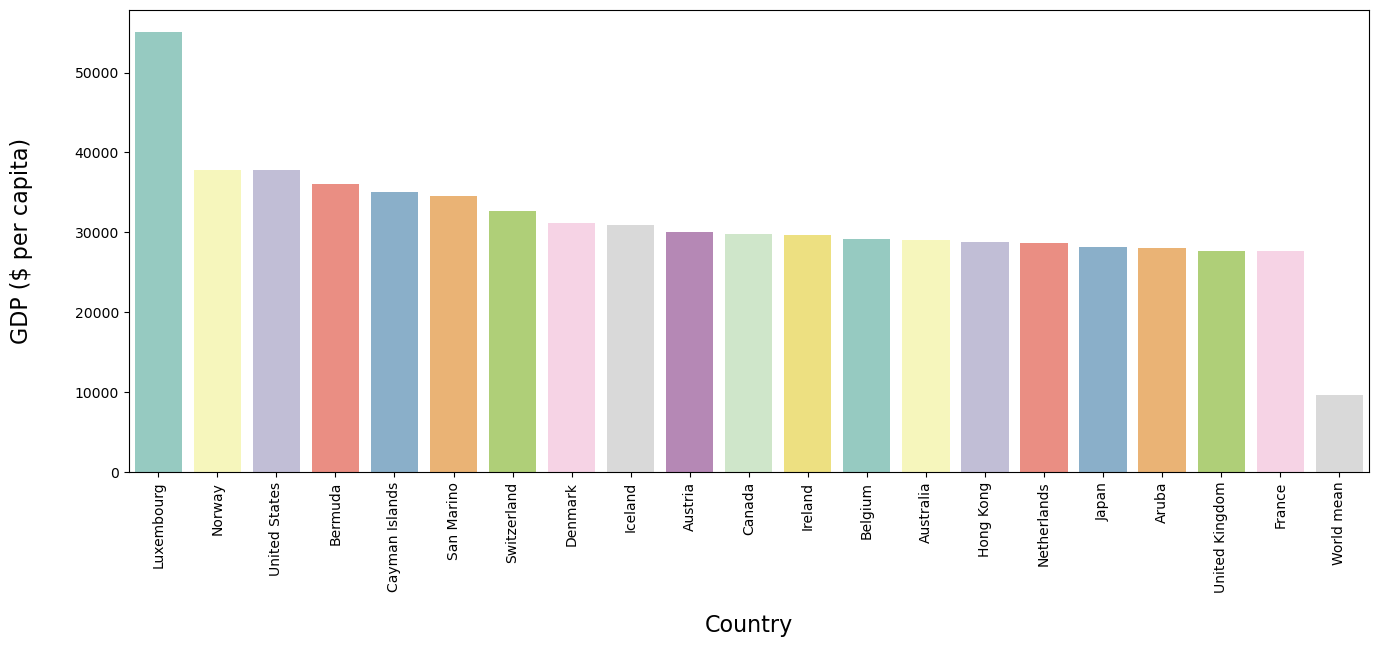

In [11]:
fig, ax = plt.subplots(figsize=(16,6))
#ax = fig.add_subplot(111)
top_gdp_countries = data.sort_values('GDP ($ per capita)',ascending=False).head(20)
mean = pd.DataFrame({'Country':['World mean'], 'GDP ($ per capita)':[data['GDP ($ per capita)'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country','GDP ($ per capita)']],mean],ignore_index=True)

sns.barplot(x='Country',y='GDP ($ per capita)',data=gdps, palette='Set3')
ax.set_xlabel(ax.get_xlabel(),labelpad=15)
ax.set_ylabel(ax.get_ylabel(),labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

# Correlation between attributes
### The heatmap shows the correlation between all the numerical variables

/tmp/ipykernel_4357/179124045.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')


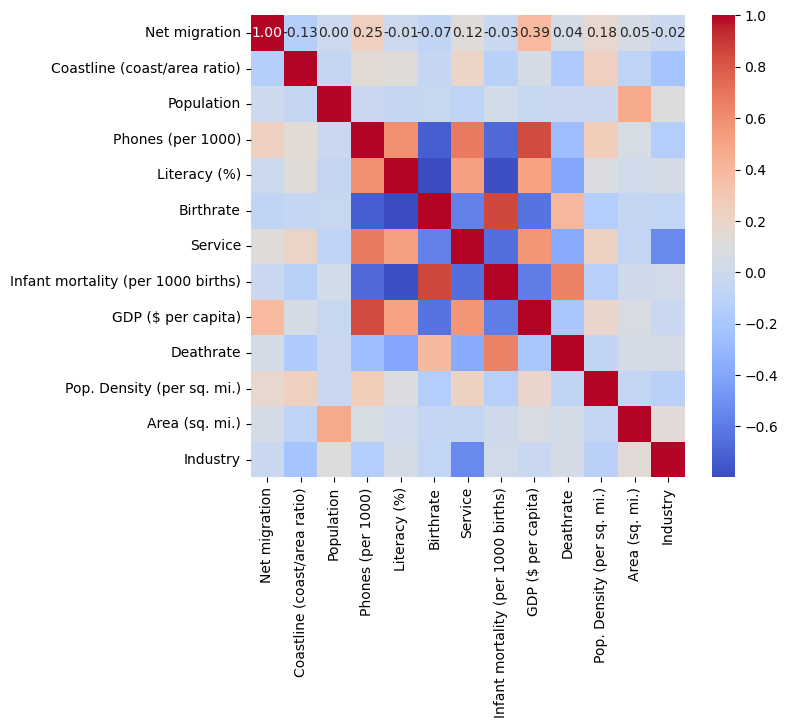

In [12]:
plt.figure(figsize=(7,6))
sns.heatmap(data=data.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Agriculture                         269 non-null    float64
 1   Country                             269 non-null    object 
 2   Net migration                       269 non-null    float64
 3   Coastline (coast/area ratio)        269 non-null    float64
 4   Population                          269 non-null    float64
 5   Phones (per 1000)                   269 non-null    float64
 6   Literacy (%)                        269 non-null    float64
 7   Birthrate                           269 non-null    float64
 8   Service                             269 non-null    float64
 9   Infant mortality (per 1000 births)  269 non-null    float64
 10  GDP ($ per capita)                  269 non-null    float64
 11  Deathrate                           269 non-n

# Top Factors Affecting GDP
We pick the six columns that are mostly correlated with GDP and use scatter plots on them.

/tmp/ipykernel_4357/105118450.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  corr_to_gdp = pd.Series()


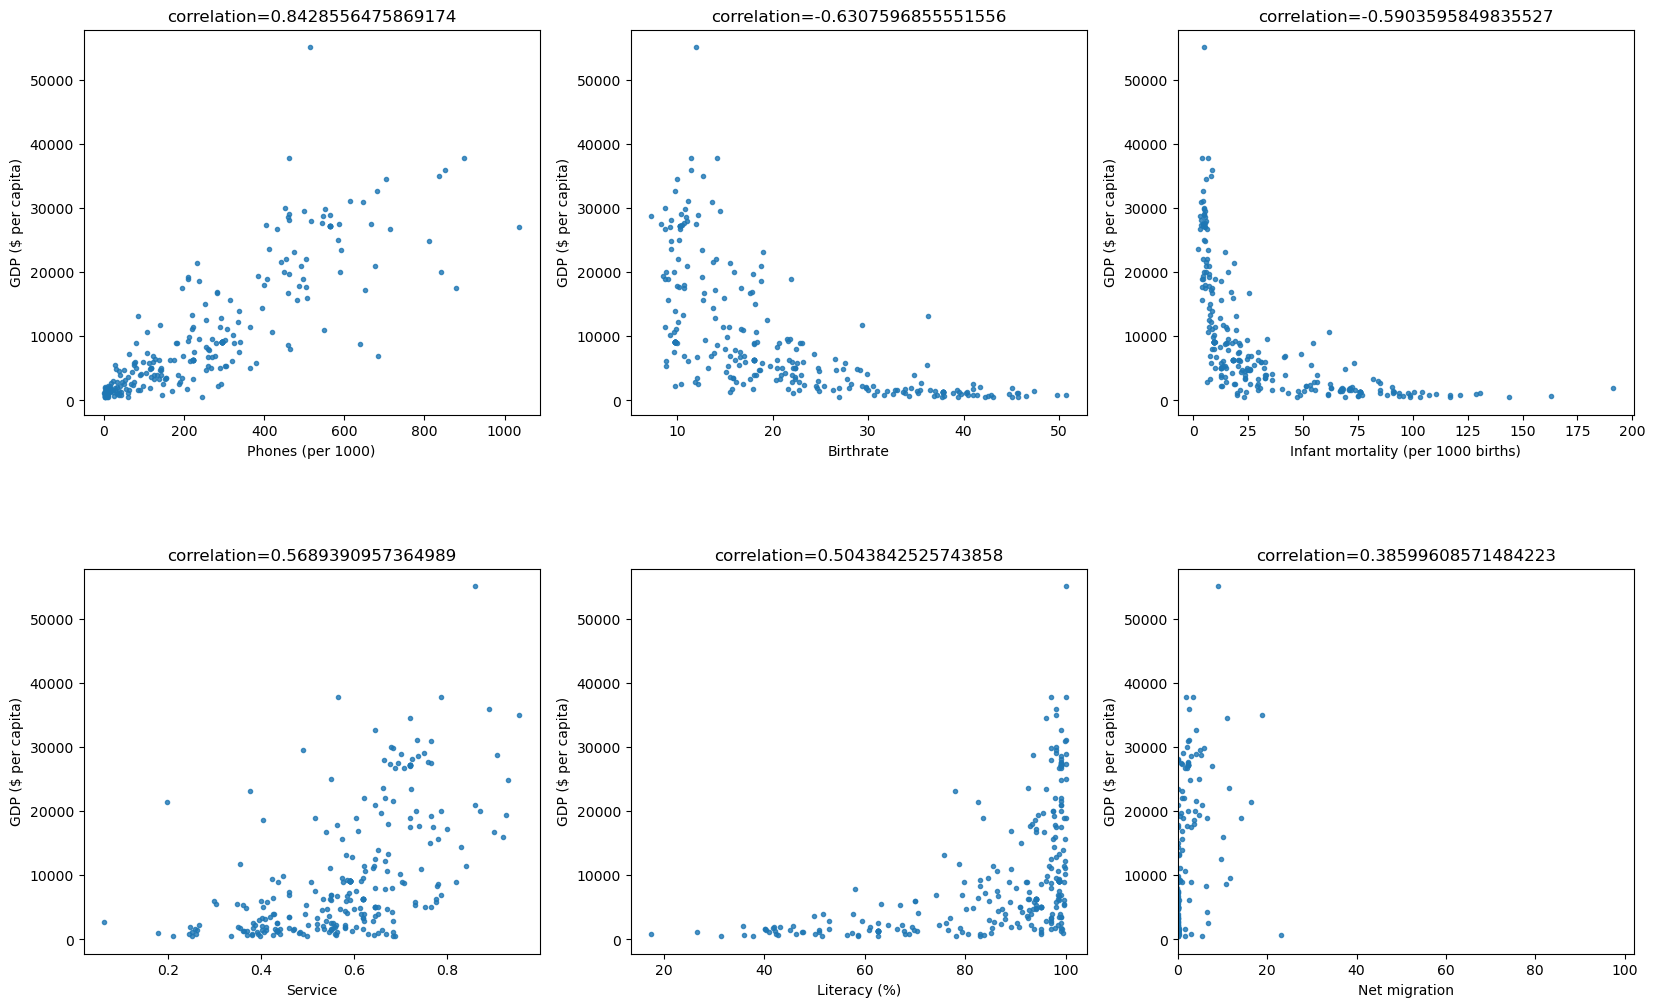

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in data.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Region')&(col!='Climate')):
        corr_to_gdp[col] = data['GDP ($ per capita)'].corr(data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=data,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

# Countries with low Birthrate and low GDP per capita

#### Countries with low birth rates (<14%) and low GDP per capita (<$10,000) share high literacy rates with higher-GDP nations. However, distinguishing features include a lesser reliance on services in their economy, limited phone penetration, negative net migration, and a prevalence in Eastern Europe or the Commonwealth of Independent States (C.W. of IND. STATES). The 'region' feature becomes crucial in differentiating them from low birth rate countries with higher average GDPs.

In [15]:
data.loc[(data['Birthrate']<14)&(data['GDP ($ per capita)']<10000)]

,Agriculture,Country,Net migration,Coastline (coast/area ratio),Population,Phones (per 1000),Literacy (%),Birthrate,Service,Infant mortality (per 1000 births),GDP ($ per capita),Deathrate,Region,Pop. Density (per sq. mi.),Area (sq. mi.),Industry,Climate
11,0.2390,Armenia,-6.470,0.000,2.976372e+06,195.70,98.6,12.07,0.418,23.28,3500.0,8.23,C.W. OF IND. STATES,99.90,29800.0,0.3430,Temperate Grasslands/Steppe
20,0.0930,Belarus,2.540,0.000,1.029301e+07,319.10,99.6,11.16,0.591,13.37,6100.0,14.02,C.W. OF IND. STATES,49.60,207600.0,0.3160,Temperate Grasslands/Steppe
28,0.1420,Bosnia & Herzegovina,0.310,0.040,4.498976e+06,215.40,98.6,8.77,0.550,21.05,6100.0,8.27,EASTERN EUROPE,88.00,51129.0,0.3080,Temperate Grasslands/Steppe
30,0.0815,Bouvet Island,0.085,0.065,6.412408e+06,296.05,98.6,9.72,0.591,9.33,9100.0,10.31,EASTERN EUROPE,102.75,67704.0,0.3095,Temperate Grasslands/Steppe
32,0.0815,British Indian Ocean Territory,0.085,0.065,6.412408e+06,296.05,98.6,9.72,0.591,9.33,9100.0,10.31,EASTERN EUROPE,102.75,67704.0,0.3095,Equatorial
35,0.0930,Bulgaria,-4.580,0.320,7.385367e+06,336.30,98.6,9.65,0.603,20.55,7600.0,14.27,EASTERN EUROPE,66.60,110910.0,0.3040,Temperate Grasslands/Steppe
48,0.1250,China,-0.400,0.150,1.313974e+09,266.70,90.9,13.25,0.403,24.18,5000.0,6.97,ASIA (EX. NEAR EAST),136.90,9596960.0,0.4730,Warm Temperate/Mediterranean
49,0.0815,Christmas Island,0.085,0.065,6.412408e+06,296.05,98.6,9.72,0.591,9.33,9100.0,10.31,EASTERN EUROPE,102.75,67704.0,0.3095,Savana/Sudan
50,0.0815,Cocos (Keeling) Islands,0.085,0.065,6.412408e+06,296.05,98.6,9.72,0.591,9.33,9100.0,10.31,EASTERN EUROPE,102.75,67704.0,0.3095,Savana/Sudan
58,0.0550,Cuba,-1.580,3.370,1.138282e+07,74.70,97.0,11.89,0.684,6.33,2900.0,7.22,LATIN AMER. & CARIB,102.70,110860.0,0.2610,Hot/Mid-Latitude Desert


# Modeling
First label encode the categorical features ‘Region’ and ‘Climate’, and we will use all features given in the data set without further feature engineering.

In [16]:
LE = LabelEncoder()
data['Region_label'] = LE.fit_transform(data['Region'])
data['Climate_label'] = LE.fit_transform(data['Climate'])
data.head()

,Agriculture,Country,Net migration,Coastline (coast/area ratio),Population,Phones (per 1000),Literacy (%),Birthrate,Service,Infant mortality (per 1000 births),GDP ($ per capita),Deathrate,Region,Pop. Density (per sq. mi.),Area (sq. mi.),Industry,Climate,Region_label,Climate_label
0,0.3800,Afghanistan,23.060,0.00,31056997.0,3.2,36.0,46.600,0.380,163.070,700.0,20.34,ASIA (EX. NEAR EAST),48.00,647500.0,0.240,Warm Temperate/Mediterranean,1,6
1,0.0220,Aland Islands,2.365,2.00,4921096.0,564.5,99.0,10.325,0.720,4.705,27200.0,9.56,WESTERN EUROPE,167.15,42310.0,0.245,Cool/Taiga/Siberian Temperate,11,1
2,0.2320,Albania,-4.930,1.26,3581655.0,71.2,86.5,15.110,0.579,21.520,4500.0,5.22,EASTERN EUROPE,124.60,28748.0,0.188,Temperate Grasslands/Steppe,4,5
3,0.1010,Algeria,-0.390,0.04,32930091.0,78.1,70.0,17.140,0.298,31.000,6000.0,4.61,NORTHERN AFRICA,13.80,2381740.0,0.600,Hot/Mid-Latitude Desert,7,3
4,0.1505,American Samoa,-20.710,58.29,57794.0,259.5,97.0,22.460,0.644,9.270,8000.0,3.27,OCEANIA,290.40,199.0,0.171,Savana/Sudan,9,4


### Split our data into training and testing set

In [17]:
train, test = train_test_split(data, test_size=0.3, shuffle=True)
training_features = ['Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'Literacy (%)', 'Phones (per 1000)', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service', 'Region_label',
       'Climate_label','Service']
target = 'GDP ($ per capita)'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

### We will use linear regression model. As for metric, We can check both root mean squared error and mean squared log error. 
Note: RMSE between 0.2 and 0.9 is considered a good model.

In [18]:
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 4540.291142071857 msle_train: 4.869409803735553
rmse_test: 4612.399300084448 msle_test: 2.139117580972067


## Random Forest
As we know our target is not linear with most of the features so, we will use some non-linear models. 


In [19]:
model = RandomForestRegressor(n_estimators = 50,
                             max_depth = 6,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 3213.317288045969 msle_train: 0.152716014710472
rmse_test: 3539.6976059199246 msle_test: 0.2606576858928249


## Model Visualisation
We will use scatter plot to see how the model is doing. As seen in the visualisation, the prediction given by the model is quite reasonable, as the data points are gathering around y=x.

/tmp/ipykernel_4357/2212052071.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_test_Y = train_Y.append(test_Y)
/tmp/ipykernel_4357/2212052071.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_test_pred_Y = train_pred_Y.append(test_pred_Y)


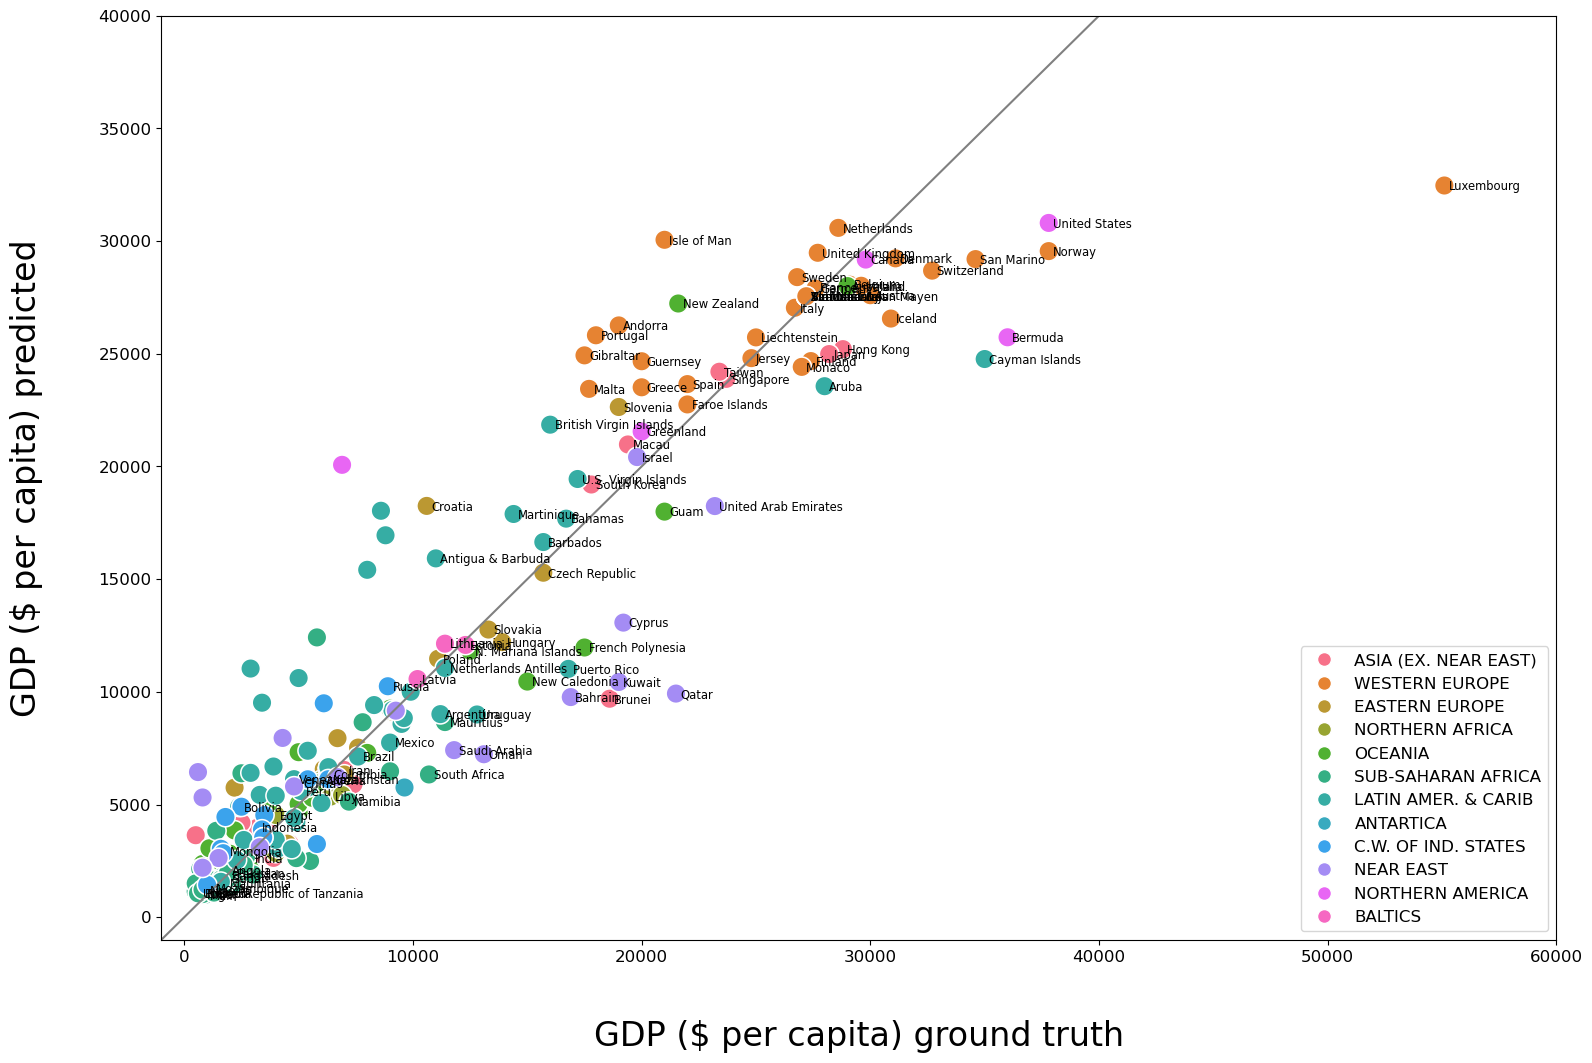

In [31]:
plt.figure(figsize=(18,12))

train_test_Y = train_Y.append(test_Y)
train_test_pred_Y = train_pred_Y.append(test_pred_Y)


data_shuffled = data.loc[train_test_Y.index]
label = data_shuffled['Country']

colors = {'ASIA (EX. NEAR EAST)         ':'red',
          'EASTERN EUROPE                     ':'orange',
          'NORTHERN AFRICA                    ':'gold',
          'OCEANIA                            ':'green',
          'WESTERN EUROPE                     ':'blue',
          'SUB-SAHARAN AFRICA                 ':'purple',
          'LATIN AMER. & CARIB    ':'olive',
          'C.W. OF IND. STATES ':'cyan',
          'NEAR EAST                          ':'hotpink',
          'NORTHERN AMERICA                   ':'lightseagreen',
          'BALTICS                            ':'rosybrown'}

unique_regions = data['Region'].unique()
colors = dict(zip(unique_regions, sns.color_palette("husl", len(unique_regions))))
legend_labels = []
for region, color in colors.items():
    X = train_test_Y.loc[data_shuffled['Region']==region]
    Y = train_test_pred_Y.loc[data_shuffled['Region']==region]
    ax = sns.scatterplot(x=X, y=Y, hue='Region', data=data, palette=colors, s=200, linewidths=0, label = region)
    legend_labels.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=region))

plt.legend(handles = legend_labels,loc=4,prop={'size': 12})  

ax.set_xlabel('GDP ($ per capita) ground truth',labelpad=40)
ax.set_ylabel('GDP ($ per capita) predicted',labelpad=40)
ax.xaxis.label.set_fontsize(24)
ax.yaxis.label.set_fontsize(24)
ax.tick_params(labelsize=12)

x = np.linspace(-1000,50000,100) # 100 linearly spaced numbers
y = x
plt.plot(x,y,c='gray')

plt.xlim(-1000,60000)
plt.ylim(-1000,40000)

for i in range(0,train_test_Y.shape[0]):
    if((data_shuffled['Area (sq. mi.)'].iloc[i]>8e5) |
       (data_shuffled['Population'].iloc[i]>1e8) |
       (data_shuffled['GDP ($ per capita)'].iloc[i]>10000)):
        plt.text(train_test_Y.iloc[i]+200, train_test_pred_Y.iloc[i]-200, label.iloc[i], size='small')


## Total GDP
We will take a look into Total GDP which we take as 'GDP per Capita' x 'Population'.
Here are the top 10 countries with highest total GDPs, their GDP make up to about 2/3 of the global GDP.

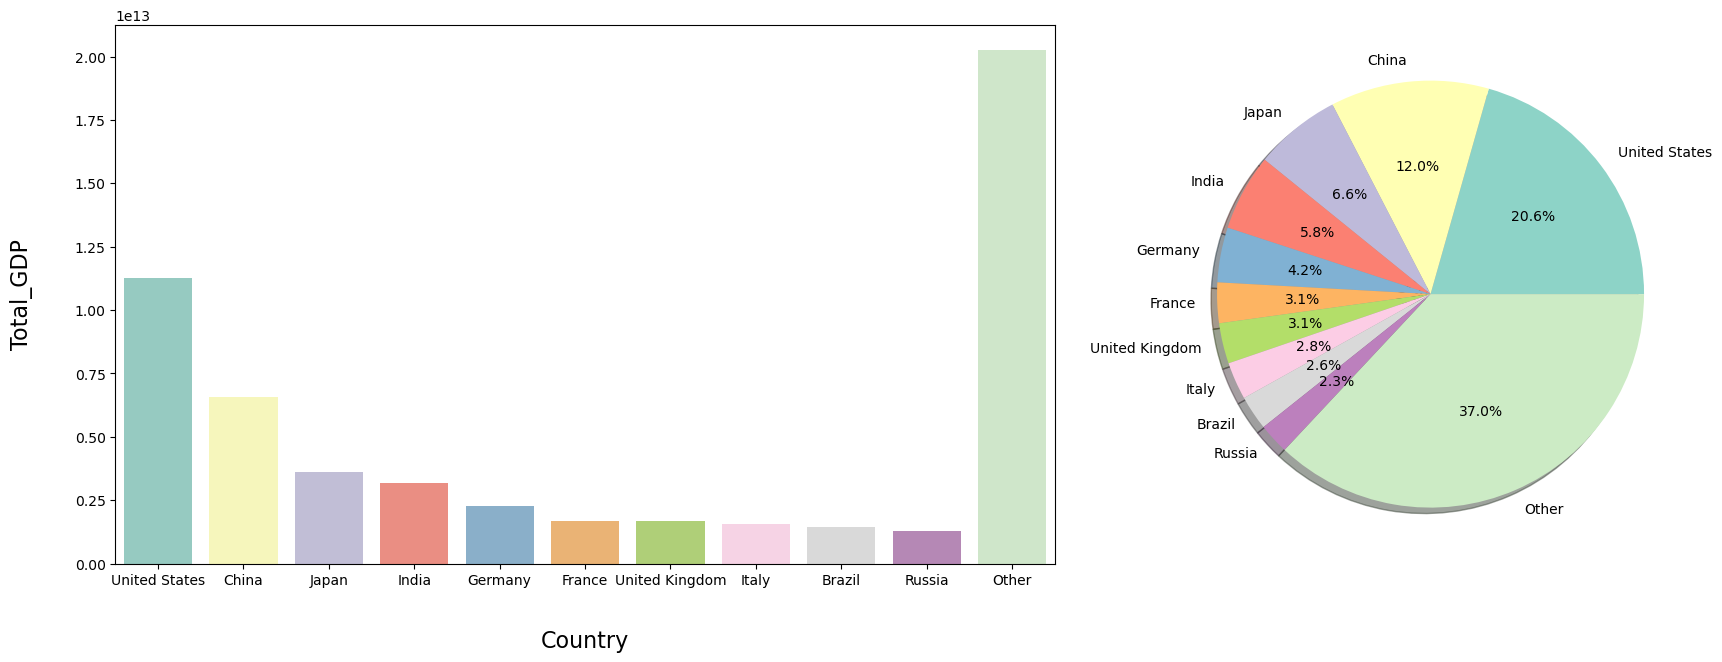

In [32]:
data['Total_GDP ($)'] = data['GDP ($ per capita)'] * data['Population']
#plt.figure(figsize=(16,6))
top_gdp_countries = data.sort_values('Total_GDP ($)',ascending=False).head(10)
other = pd.DataFrame({'Country':['Other'], 'Total_GDP ($)':[data['Total_GDP ($)'].sum() - top_gdp_countries['Total_GDP ($)'].sum()]})
gdps = pd.concat([top_gdp_countries[['Country','Total_GDP ($)']],other],ignore_index=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7),gridspec_kw = {'width_ratios':[2,1]})
sns.barplot(x='Country',y='Total_GDP ($)',data=gdps,ax=axes[0],palette='Set3')
axes[0].set_xlabel('Country',labelpad=30,fontsize=16)
axes[0].set_ylabel('Total_GDP',labelpad=30,fontsize=16)

colors = sns.color_palette("Set3", gdps.shape[0]).as_hex()
axes[1].pie(gdps['Total_GDP ($)'], labels=gdps['Country'],colors=colors,autopct='%1.1f%%',shadow=True)
axes[1].axis('equal')
plt.show()

### We will compare the above 10 countries' rank in Total GDP and their GDP per Capita
Simply: 
rank of Total GDP - rank of GDP per Capita

In [33]:
Rank1 = data[['Country','Total_GDP ($)']].sort_values('Total_GDP ($)', ascending=False).reset_index()
Rank2 = data[['Country','GDP ($ per capita)']].sort_values('GDP ($ per capita)', ascending=False).reset_index()
Rank1 = pd.Series(Rank1.index.values+1, index=Rank1.Country)
Rank2 = pd.Series(Rank2.index.values+1, index=Rank2.Country)
Rank_change = (Rank2-Rank1).sort_values(ascending=False)
print('rank of total GDP - rank of GDP per capita:')
Rank_change.loc[top_gdp_countries.Country]


rank of total GDP - rank of GDP per capita:


Country
United States       2
China             147
Japan              14
India             181
Germany            16
France             14
United Kingdom     12
Italy              23
Brazil            105
Russia             97
dtype: int64

#### We see the countries with high total GDPs are quite different from those with high average GDPs.
#### China and India jump above a lot when it comes to the total GDP.
#### The only country that is with in top 10 (in fact top 2) for both total and average GDPs is the United States.

## Factors Affecting Total GDP


In [37]:
corr_to_gdp = pd.Series()
for col in data.columns.values[2:]:
    if ((col!='Total_GDP ($)')&(col!='Climate')&(col!='GDP ($ per capita)')&(col!='Region')&(col!='Climate')):
        corr_to_gdp[col] = data['Total_GDP ($)'].corr(data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]
print(corr_to_gdp)

Population                            0.642043
Area (sq. mi.)                        0.561621
Phones (per 1000)                     0.225971
Birthrate                            -0.148389
Climate_label                         0.112103
Infant mortality (per 1000 births)   -0.110029
Literacy (%)                          0.087064
Service                               0.083422
Region_label                         -0.072753
Coastline (coast/area ratio)         -0.057998
Net migration                         0.055514
Industry                              0.052725
Deathrate                            -0.038546
Pop. Density (per sq. mi.)           -0.022954
dtype: float64


/tmp/ipykernel_4357/2408733745.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  corr_to_gdp = pd.Series()


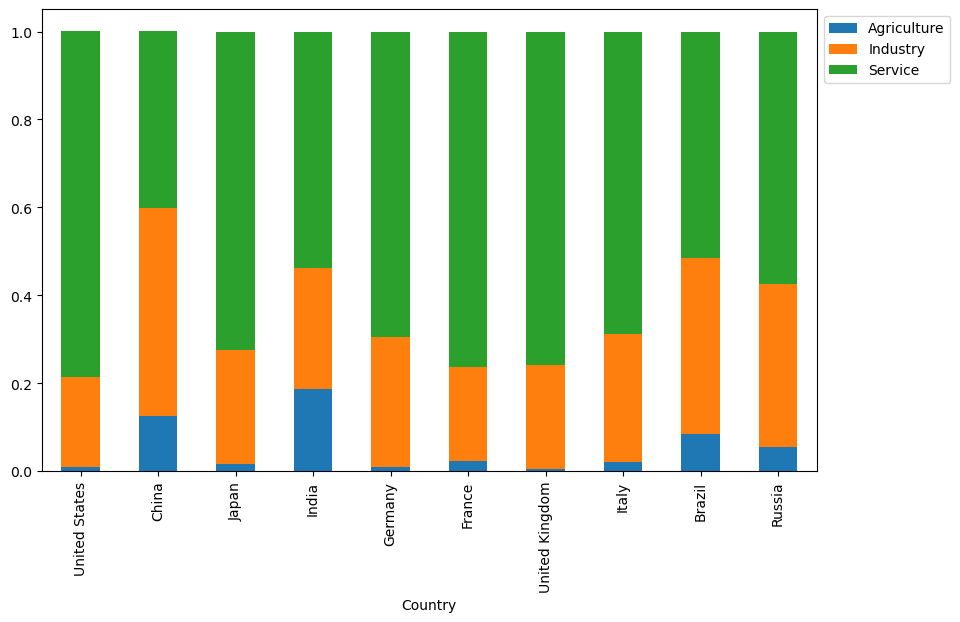

In [38]:
plot_data = top_gdp_countries.head(10)[['Country','Agriculture', 'Industry', 'Service']]
plot_data = plot_data.set_index('Country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()